<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/Customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv", encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [74]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [75]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [76]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [77]:
df.shape

(541909, 8)

In [0]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [79]:
df.shape

(406829, 8)

In [80]:
df.drop_duplicates(inplace = True)
df.shape

(401604, 8)

In [81]:
df = df[(df.InvoiceNo).apply(lambda x:( 'C' not in x))]
df.shape    #(392732, 8)

(392732, 8)

In [82]:
df.Country.value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [83]:
df.drop(['InvoiceNo','Description','StockCode','InvoiceDate','Country'],axis = 1,inplace = True)
df.shape

(392732, 3)

In [84]:
k = df['UnitPrice'].groupby(df['CustomerID'])
len(list(k))

4339

In [85]:
j = df.groupby('CustomerID')
j.head(5)

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
9,32,1.69,13047.0
10,6,2.10,13047.0
11,6,2.10,13047.0
12,8,3.75,13047.0
13,6,1.65,13047.0


In [86]:
df_cluster=pd.DataFrame(columns=['Quantity','UnitPrice','CustomerID'])
count=0
for k,v in (j):
    df_cluster.loc[count] = [(v['Quantity'].sum()), v['UnitPrice'].sum(), k]
    count+=1
df_cluster.shape  #(4339, 3)

(4339, 3)

In [0]:
X = df_cluster.iloc[:,[0,1]].values

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Text(0.5, 1.0, 'Elbow Curve')

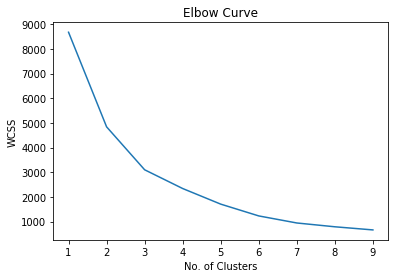

In [89]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1,10):
  km = KMeans(n_clusters = i, max_iter = 100).fit(X)
  wcss.append(km.inertia_)
  
plt.plot(np.arange(1,10), wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Curve")

In [0]:
km = KMeans(n_clusters = 3, max_iter = 100).fit(X)
y_kmeans = km.fit_predict(X)

In [91]:
y_kmeans

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [92]:
print((y_kmeans == 0).sum())
print((y_kmeans == 1).sum())
print((y_kmeans == 2).sum())

4321
13
5


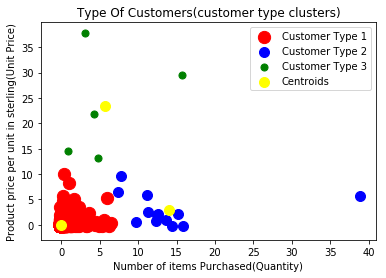

In [93]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 150, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer Type 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.legend()
plt.show()